In [44]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re
import statistics
import seaborn as sns
%matplotlib inline
from datetime import date

Overview

In [23]:
data=pd.read_csv("data/nba2k-full.csv")

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    464 non-null    object
 1   rating       464 non-null    int64 
 2   jersey       464 non-null    object
 3   team         441 non-null    object
 4   position     464 non-null    object
 5   b_day        464 non-null    object
 6   height       464 non-null    object
 7   weight       464 non-null    object
 8   salary       464 non-null    object
 9   country      464 non-null    object
 10  draft_year   464 non-null    int64 
 11  draft_round  464 non-null    object
 12  draft_peak   464 non-null    object
 13  college      388 non-null    object
 14  version      464 non-null    object
dtypes: int64(2), object(13)
memory usage: 54.5+ KB


In [25]:
display(data.head())

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20


In [26]:
# veri kümesindeki boş değerlere sahip ssütunlar

display(data.isna().sum())

full_name       0
rating          0
jersey          0
team           23
position        0
b_day           0
height          0
weight          0
salary          0
country         0
draft_year      0
draft_round     0
draft_peak      0
college        76
version         0
dtype: int64

In [27]:
# "jersey" sütunundaki "#" işaretini kaldırma

data['jersey'] = data['jersey'].str.replace('#', '')

# Değişikliği kontrol etmek için ilk birkaç satırı gösterme

display(data['jersey'].head(30))

0     23
1      2
2     34
3      7
4     13
5     30
6      3
7     13
8      0
9     21
10    11
11    15
12     0
13    11
14    32
15    22
16    27
17    23
18    45
19     8
20    77
21    12
22     3
23    10
24    10
25     3
26     4
27     6
28     0
29    43
Name: jersey, dtype: object

In [46]:
# "full_name" sütununun adını "player_name" olarak değiştirme

data.rename(columns={'full_name': 'player_name'}, inplace=True)
display(data.head())

,player_name,rating,jersey,team,position,b_day,height (m),weight (kg),salary,country,draft_year,draft_round,draft_peak,college,version,age
0,LeBron James,97,23,Los Angeles Lakers,F,1984-12-30,2.06,113.4,37436858.0,USA,2003,1,1,No College,NBA2k20,36.0
1,Kawhi Leonard,97,2,Los Angeles Clippers,F,1991-06-29,2.01,102.1,32742000.0,USA,2011,1,15,San Diego State,NBA2k20,29.0
2,Giannis Antetokounmpo,96,34,Milwaukee Bucks,F-G,1994-12-06,2.11,109.8,25842697.0,Greece,2013,1,15,No College,NBA2k20,26.0
3,Kevin Durant,96,7,Brooklyn Nets,F,1988-09-29,2.08,104.3,37199000.0,USA,2007,1,2,Texas,NBA2k20,32.0
4,James Harden,96,13,Houston Rockets,G,1989-08-26,1.96,99.8,38199000.0,USA,2009,1,3,Arizona State,NBA2k20,31.0


In [29]:
# the names of the columns

display(f'There are {data.shape[0]} rows and {data.shape[1]} columns.\n')
display(f'Column names: {data.columns.values}')

'There are 464 rows and 15 columns.\n'

"Column names: ['player_name' 'rating' 'jersey' 'team' 'position' 'b_day' 'height'\n 'weight' 'salary' 'country' 'draft_year' 'draft_round' 'draft_peak'\n 'college' 'version']"

VERİ TEMİZLEME

In [49]:
# Veri temizleme
# height sütununu düzenleme

data['height'] = data['height'].apply(lambda x: float(x.split('/')[-1].strip()) if '/' in x else (int(x.split('-')[0]) * 0.3048) + (int(x.split('-')[1]) * 0.0254))
display(data)

KeyError: 'height'

In [31]:
# height başlığını değiştirme

data.rename(columns={'height': 'height (m)'}, inplace=True)
display(data)

,player_name,rating,jersey,team,position,b_day,height (m),weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,23,Los Angeles Lakers,F,12/30/84,2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,2,Los Angeles Clippers,F,06/29/91,2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,34,Milwaukee Bucks,F-G,12/06/94,2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,7,Brooklyn Nets,F,09/29/88,2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,13,Houston Rockets,G,08/26/89,1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,Chris Paul,88,3,Oklahoma City Thunder,G,05/06/85,1.85,175 lbs. / 79.4 kg.,$41358814,USA,2005,1,4,Wake Forest,NBA2k21
460,Bradley Beal,88,3,Washington Wizards,G,06/28/93,1.91,207 lbs. / 93.9 kg.,$28751774,USA,2012,1,3,Florida,NBA2k21
461,Rudy Gobert,87,27,Utah Jazz,C,06/26/92,2.16,238 lbs. / 108 kg.,$27525281,France,2013,1,27,NaN,NBA2k21
462,Kyle Lowry,87,7,Toronto Raptors,G,03/25/86,1.83,205 lbs. / 93 kg.,$30500000,USA,2006,1,24,Villanova,NBA2k21


In [50]:
data['weight'] = data['weight'].apply(lambda x: float(x.split('/')[-1].split()[0]) if '/' in x else float(x))
display(data)

KeyError: 'weight'

In [33]:
# weight başlığını değiştirme

data.rename(columns={'weight': 'weight (kg)'}, inplace=True)
display(data)

,player_name,rating,jersey,team,position,b_day,height (m),weight (kg),salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,23,Los Angeles Lakers,F,12/30/84,2.06,113.4,$37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,2,Los Angeles Clippers,F,06/29/91,2.01,102.1,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,34,Milwaukee Bucks,F-G,12/06/94,2.11,109.8,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,7,Brooklyn Nets,F,09/29/88,2.08,104.3,$37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,13,Houston Rockets,G,08/26/89,1.96,99.8,$38199000,USA,2009,1,3,Arizona State,NBA2k20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,Chris Paul,88,3,Oklahoma City Thunder,G,05/06/85,1.85,79.4,$41358814,USA,2005,1,4,Wake Forest,NBA2k21
460,Bradley Beal,88,3,Washington Wizards,G,06/28/93,1.91,93.9,$28751774,USA,2012,1,3,Florida,NBA2k21
461,Rudy Gobert,87,27,Utah Jazz,C,06/26/92,2.16,108.0,$27525281,France,2013,1,27,NaN,NBA2k21
462,Kyle Lowry,87,7,Toronto Raptors,G,03/25/86,1.83,93.0,$30500000,USA,2006,1,24,Villanova,NBA2k21


In [34]:
# 'salary' sütunundaki verilerin başındaki "$" işaretini kaldırma
data['salary'] = data['salary'].str.replace('$', '').astype(float)
display(data['salary'].head())

0    37436858.0
1    32742000.0
2    25842697.0
3    37199000.0
4    38199000.0
Name: salary, dtype: float64

In [35]:
# College kısmı boş olanları No College olarak doldurduk.

data['college'].fillna('No College', inplace=True)
no_college_players = data[data['college'] == 'No College']
display(no_college_players[['player_name', 'college']].head(5))

,player_name,college
0,LeBron James,No College
2,Giannis Antetokounmpo,No College
11,Nikola Jokic,No College
16,Rudy Gobert,No College
20,Luka Doncic,No College


In [36]:
# type of data

data.dtypes

player_name     object
rating           int64
jersey          object
team            object
position        object
b_day           object
height (m)     float64
weight (kg)    float64
salary         float64
country         object
draft_year       int64
draft_round     object
draft_peak      object
college         object
version         object
dtype: object

In [37]:
unique_versions = data['version'].unique()
display(unique_versions)

array(['NBA2k20', 'NBA2k21', 'NBA2k22'], dtype=object)

In [38]:
# tüm oyuncuların average rating oranları

average_rating = data['rating'].mean()
display(f'Total average rating value: {round(average_rating, 1)}')

'Total average rating value: 77.6'

In [39]:
# Her bir oyuncunun adı ve ortalama değerlendirme oranını içeren DataFrame'i oluşturma

player_average_ratings = data.groupby('player_name')['rating'].mean().reset_index()
display(player_average_ratings)

,player_name,rating
0,Aaron Gordon,81.0
1,Aaron Holiday,73.0
2,Abdel Nader,70.0
3,Admiral Schofield,71.0
4,Al Horford,85.0
...,...,...
424,Yogi Ferrell,74.0
425,Zach Collins,74.0
426,Zach LaVine,85.0
427,Zhaire Smith,72.0


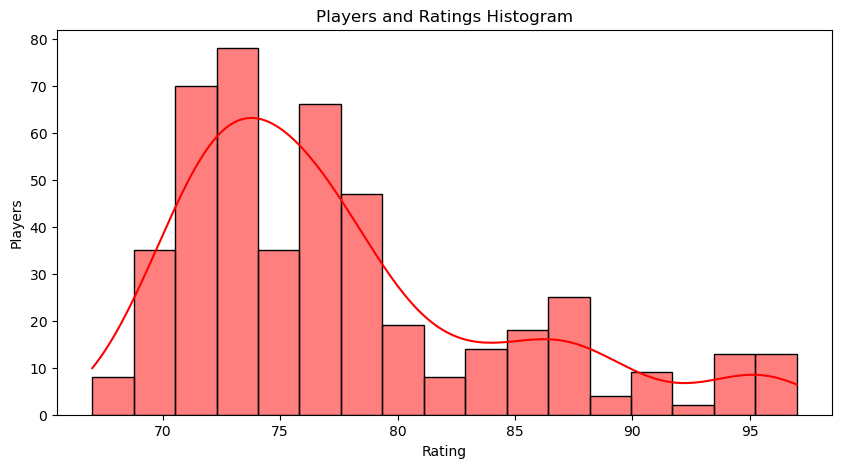

In [40]:
# Seaborn ile histogram oluşturma


plt.figure(figsize=(10, 5))
sns.histplot(data['rating'], bins='auto', kde=True, color='red')
plt.xlabel('Rating')
plt.ylabel('Players')
plt.title('Players and Ratings Histogram')
plt.show()

In [41]:
# ORTALAMA RATING İLE BÜTÜN OYUNCULARIN RATINGLERINI DEĞERLENDİRECEK YORUMLAYACAK BİR ŞEYLER EKLE

In [45]:
def age_by_version(row):
    # Eğer "NBA2k20" ise yaş hesapla
    if row['version'] == 'NBA2k20':
        birth_date = row['b_day']
        if isinstance(birth_date, date):
            return 2020 - birth_date.year - ((2020, date.today().month, date.today().day) < (birth_date.year, birth_date.month, birth_date.day))
    return None  # Diğer durumlarda None döndür

data['b_day'] = pd.to_datetime(data['b_day'])
data['age'] = data.apply(age_by_version, axis=1)

In [ ]:
# 10 youngest players.

data.sort_values(by = 'age', ascending = True)[['player_name', 'rating', 'team', 'age']].head(10)


,player_name,rating,team,age
403,Talen Horton-Tucker,70,Los Angeles Lakers,20.0
312,Sekou Doumbouya,73,Detroit Pistons,20.0
387,Darius Bazley,70,Oklahoma City Thunder,20.0
315,Nassir Little,73,Portland Trail Blazers,20.0
380,Alen Smailagic,71,Golden State Warriors,20.0
112,RJ Barrett,78,New York Knicks,20.0
137,Darius Garland,77,Cleveland Cavaliers,20.0
271,Jaxson Hayes,74,New Orleans Pelicans,20.0
72,Zion Williamson,81,New Orleans Pelicans,20.0
202,Coby White,76,Chicago Bulls,20.0


In [ ]:
# 10 oldest players.

data.sort_values(by = 'age', ascending = False)[['player_name', 'rating', 'team', 'age']].head(10)

,player_name,rating,team,age
203,Pau Gasol,75,NaN,40.0
222,Kyle Korver,75,Milwaukee Bucks,39.0
282,Tyson Chandler,73,Houston Rockets,38.0
0,LeBron James,97,Los Angeles Lakers,36.0
87,JJ Redick,80,New Orleans Pelicans,36.0
167,Jose Juan Barea,76,Dallas Mavericks,36.0
123,Andre Iguodala,78,Miami Heat,36.0
48,Chris Paul,85,Oklahoma City Thunder,35.0
339,Anthony Tolliver,72,Memphis Grizzlies,35.0
63,Marc Gasol,82,Toronto Raptors,35.0


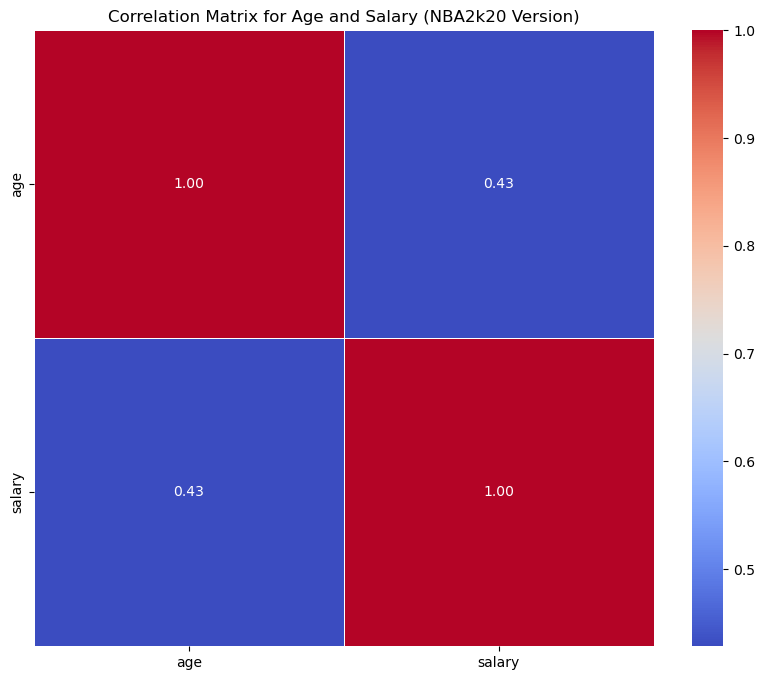

In [ ]:

# 'NBA2k20' sürümüne ait verileri seçme
nba2k20_data = data[data['version'] == 'NBA2k20']

# 'NBA2k20' sürümüne ait yaş ve maaş verilerini içeren bir alt veri çerçevesi oluşturma
age_salary_data_nba2k20 = nba2k20_data[['age', 'salary']].dropna()

# Korelasyon matrisini oluşturma
correlation_matrix = age_salary_data_nba2k20.corr()

# Korelasyon matrisini ısı haritası olarak görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Başlık ekleyin
plt.title('Correlation Matrix for Age and Salary (NBA2k20 Version)')

# Grafik göster
plt.show()

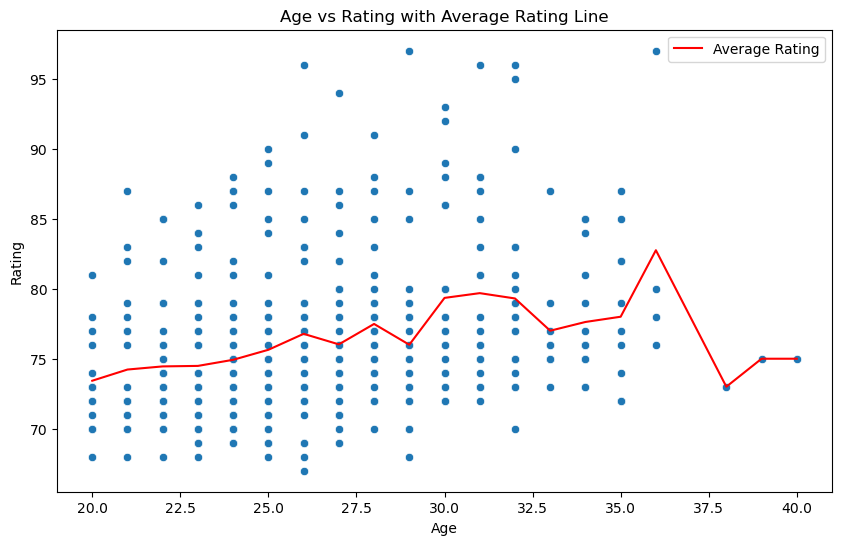

In [ ]:
# Veri çerçevesini oluşturma

age_rating_data = data[['age', 'rating']]
age_rating_avg = age_rating_data.groupby('age')['rating'].mean().reset_index()

# Scatter plot oluşturma

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='rating', data=age_rating_data)

# Ortalama rating çizgisini ekleme

sns.lineplot(x='age', y='rating', data=age_rating_avg, color='red', label='Average Rating')

# Eksen etiketleri ve başlık ekleme

plt.xlabel('Age')
plt.ylabel('Rating')
plt.title('Age vs Rating with Average Rating Line')

# Legent'ı gösterme

plt.legend()

plt.show()

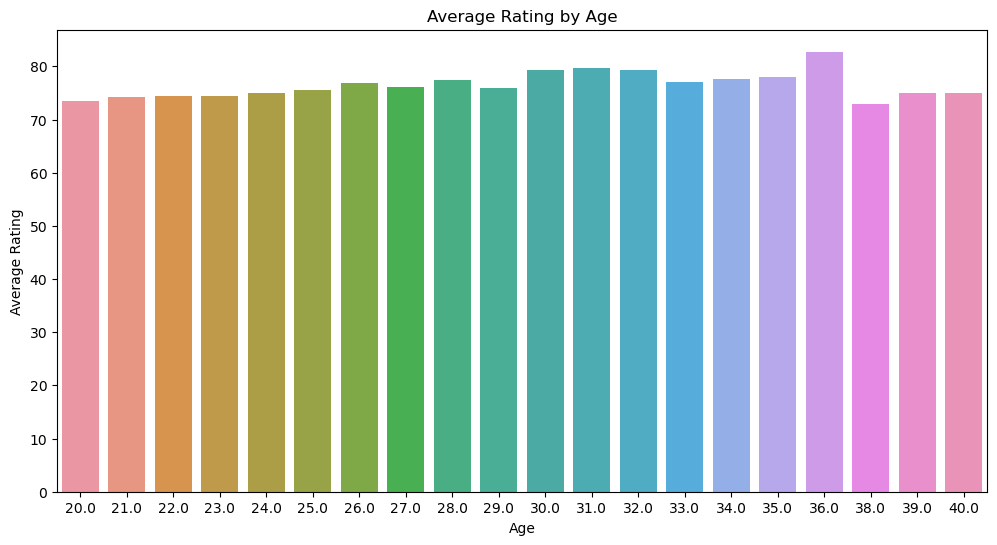

In [ ]:
# Yaşa göre gruplanmış ortalama dereceyi gösteren bir çubuk grafiği de oluşturma.

plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='rating', data=age_rating_avg)
plt.xlabel('Age')
plt.ylabel('Average Rating')
plt.title('Average Rating by Age')
plt.show()

In [ ]:
unique_players = data.drop_duplicates(subset='player_name', keep='first')
country_counts = unique_players['country'].value_counts()
players_per_country = unique_players['country'].value_counts()
print(players_per_country)

country
USA                                 323
Canada                               15
Australia                             9
France                                8
Spain                                 6
Germany                               6
Croatia                               6
Serbia                                5
Turkey                                4
Italy                                 4
Latvia                                3
Nigeria                               3
Greece                                3
Brazil                                2
Democratic Republic of the Congo      2
Ukraine                               2
Lithuania                             2
Bosnia and Herzegovina                2
The Bahamas                           2
Cameroon                              2
Slovenia                              2
Philippines                           1
Dominican Republic                    1
Haiti                                 1
Angola                          

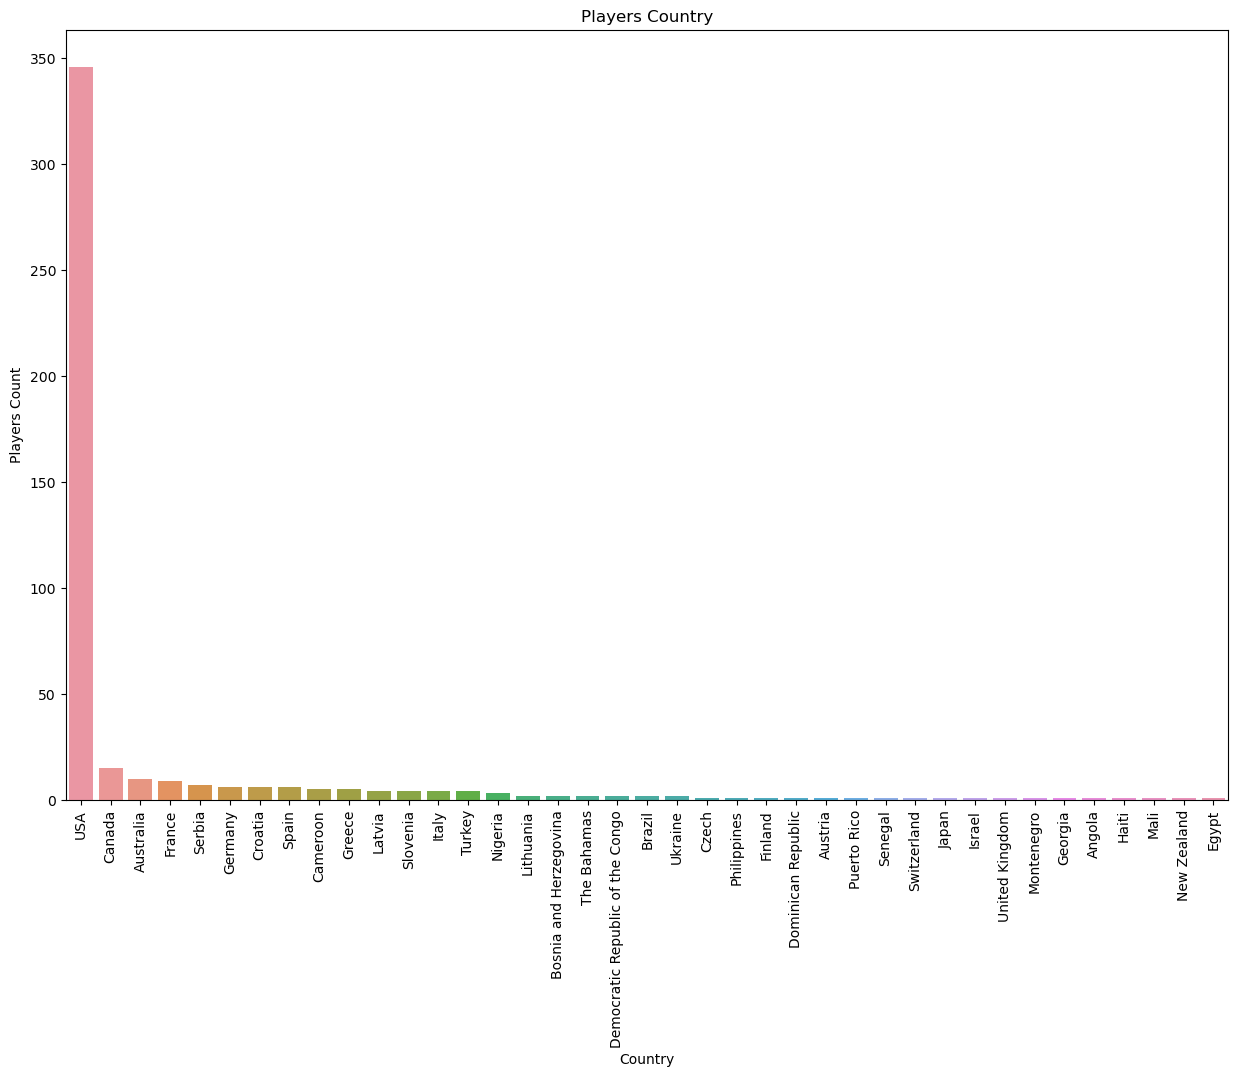

In [ ]:
country_counts = data['country'].value_counts().sort_values(ascending=False)

# Çubuk grafik oluşturma

fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x=country_counts.index, y=country_counts.values, ax=ax)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Players Count')
plt.title("Players Country")

plt.show()

C:\Users\DeLL\AppData\Local\Temp\ipykernel_1364\3353868918.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_countries_data['salary_in_thousands'] = top_countries_data['salary'] / 1000
C:\Users\DeLL\AppData\Local\Temp\ipykernel_1364\3353868918.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='country', y='salary_in_thousands', data=top_countries_data, ci=None, palette='plasma', order=sorted_countries)


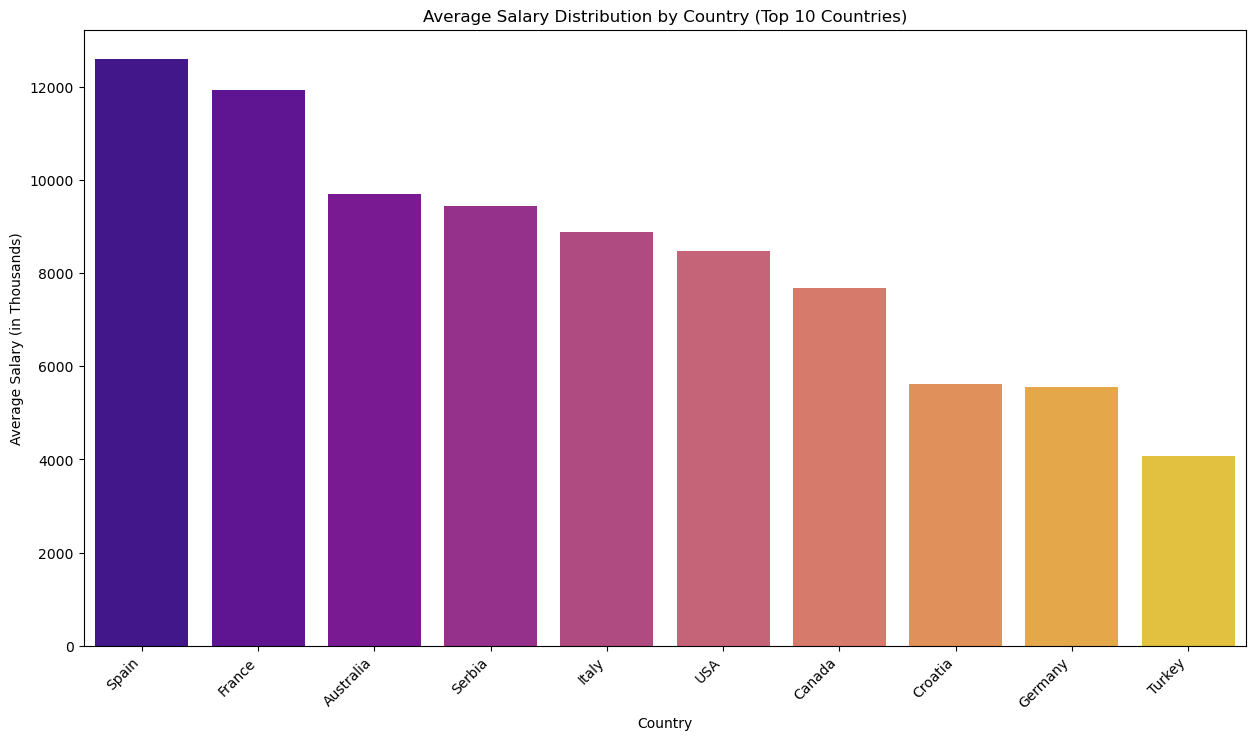

In [ ]:
# En çok temsil edilen ilk 10 ülkeleri seçme
top_countries = unique_players['country'].value_counts().nlargest(10).index

# Seçilen ülkelerin oyuncularını içeren bir alt veri çerçevesi oluşturma
top_countries_data = unique_players[unique_players['country'].isin(top_countries)]

# Daha anlamlı hale getirmek için salary'leri binler cinsinden ifade etme
top_countries_data['salary_in_thousands'] = top_countries_data['salary'] / 1000

# Ülkeleri ortalama maaşa göre sırala
sorted_countries = top_countries_data.groupby('country')['salary_in_thousands'].mean().sort_values(ascending=False).index

# Çubuk grafiği oluşturma
plt.figure(figsize=(15, 8))
sns.barplot(x='country', y='salary_in_thousands', data=top_countries_data, ci=None, palette='plasma', order=sorted_countries)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Average Salary (in Thousands)')
plt.title('Average Salary Distribution by Country (Top 10 Countries)')
plt.show()

In [ ]:
data['college'].value_counts()

college
Kentucky            28
Duke                25
North Carolina      13
Kansas              13
UCLA                13
                    ..
Tennessee State      1
Norfolk State        1
Marshall             1
Long Beach State     1
Dayton               1
Name: count, Length: 109, dtype: int64

In [ ]:
# En çok temsil edilen üniversiteler

top_colleges = data['college'].value_counts().nlargest(25)

# Liste olarak yazdırma

display("Top 25 Colleges:")
display(top_colleges)

'Top 25 Colleges:'

college
Kentucky          28
Duke              25
North Carolina    13
Kansas            13
UCLA              13
Texas             13
Villanova          9
Arizona            9
Michigan           8
Indiana            8
Florida            7
Michigan State     7
USC                7
Wake Forest        7
Washington         6
Iowa State         6
UConn              5
Virginia           5
Marquette          5
Gonzaga            5
Tennessee          5
Texas A&M          5
Louisville         5
Creighton          4
Colorado           4
Name: count, dtype: int64

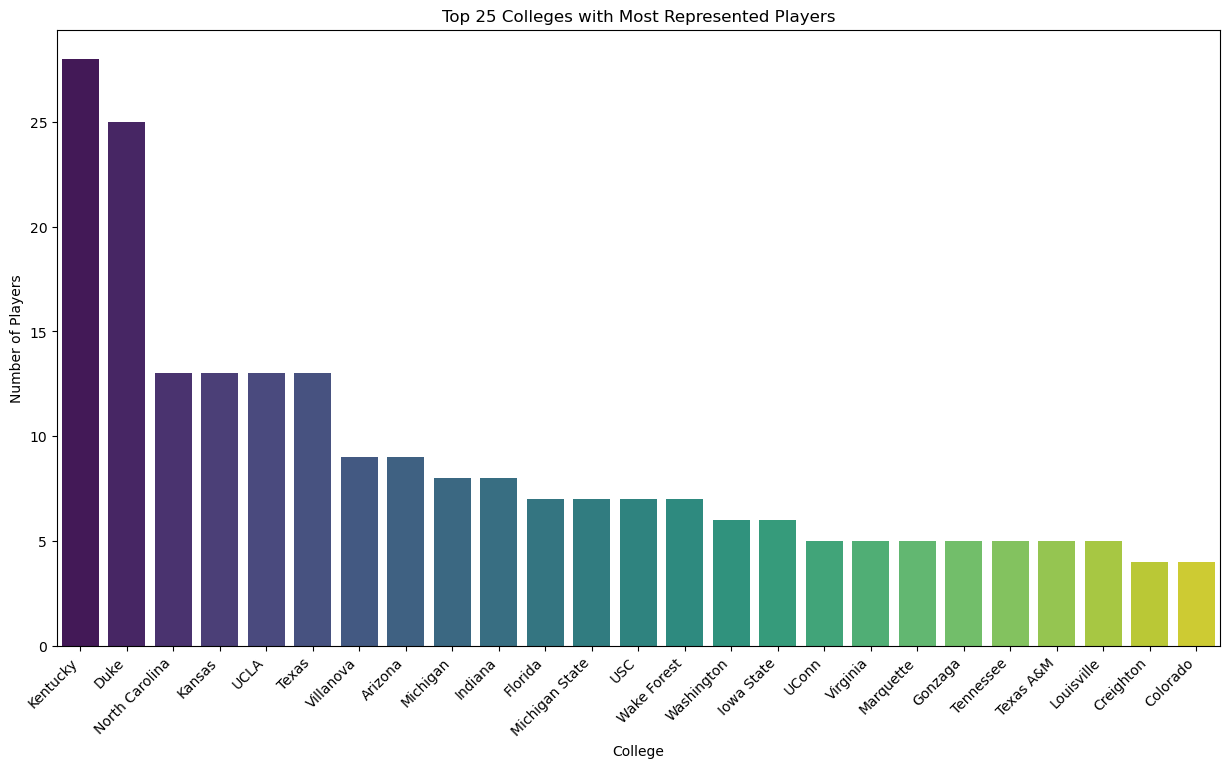

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(x=top_colleges.index, y=top_colleges.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel('College')
plt.ylabel('Number of Players')
plt.title('Top 25 Colleges with Most Represented Players')
plt.show()

In [ ]:
# all most of the nba players come from USA and the Canada.

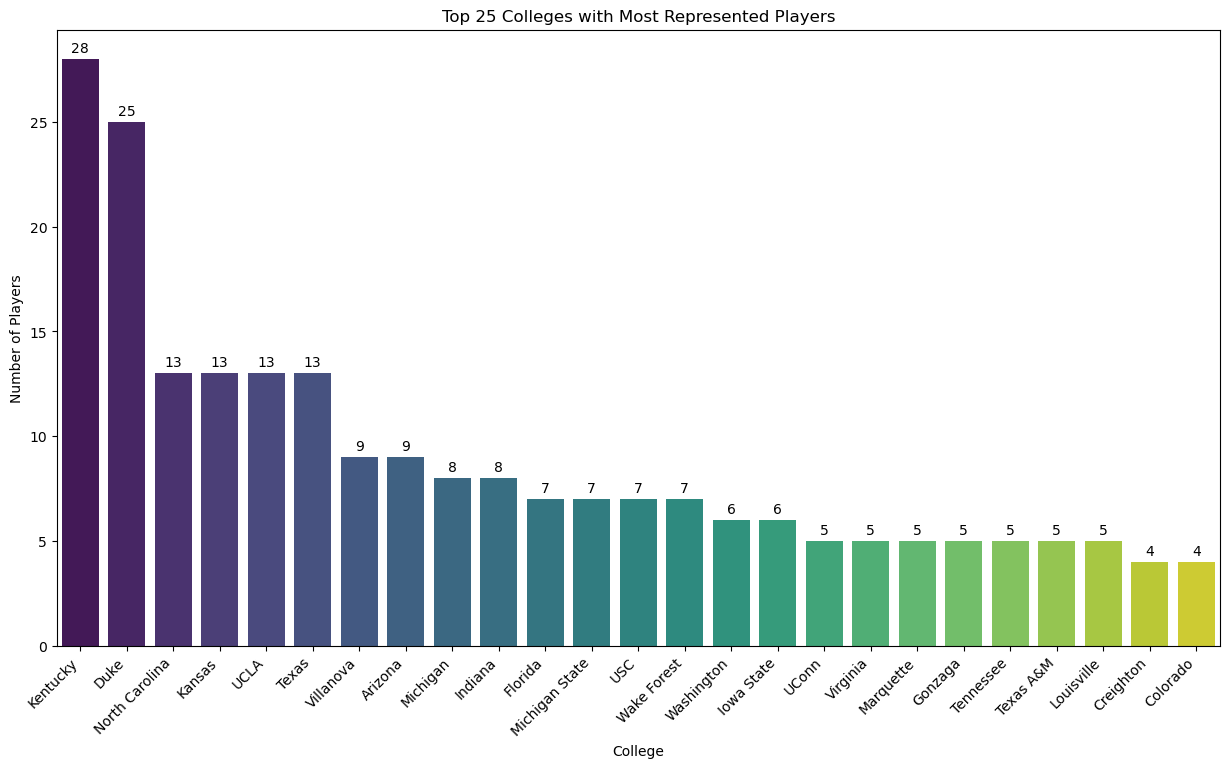

In [ ]:
# Çubuk grafik oluşturma
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=top_colleges.index, y=top_colleges.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel('College')
plt.ylabel('Number of Players')
plt.title('Top 25 Colleges with Most Represented Players')

# Her bir çubuğun üzerine sayıları ekleme
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

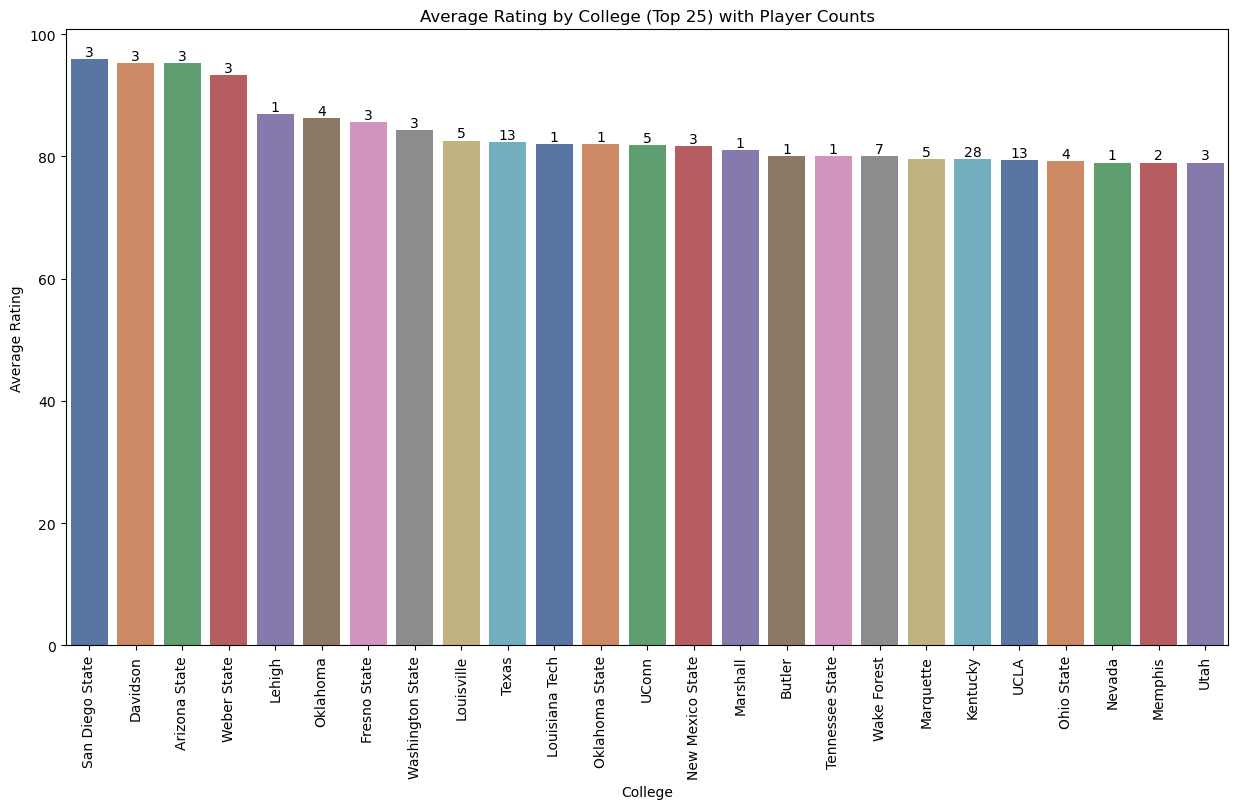

In [ ]:
# Her kolejdeki oyuncuların rating ortalamasını ve oyuncu sayısını hesaplama 
college_stats = data.groupby('college').agg({'rating': 'mean', 'player_name': 'count'})
college_stats = college_stats.sort_values(by='rating', ascending=False).head(25)

# Sadece ilk 15 kolej için veriyi içeren çubuk grafiği oluşturma

plt.figure(figsize=(15, 8))
ax = sns.barplot(x=college_stats.index, y=college_stats['rating'], palette='deep')
plt.xticks(rotation=90)
plt.xlabel('College')
plt.ylabel('Average Rating')
plt.title('Average Rating by College (Top 25) with Player Counts')

# Oyuncu sayılarını çubukların üzerine ekleme

for i, v in enumerate(college_stats['player_name']):
    ax.text(i, college_stats['rating'].iloc[i] + 0.01, str(v), ha='center', va='bottom', color='black')

plt.show()

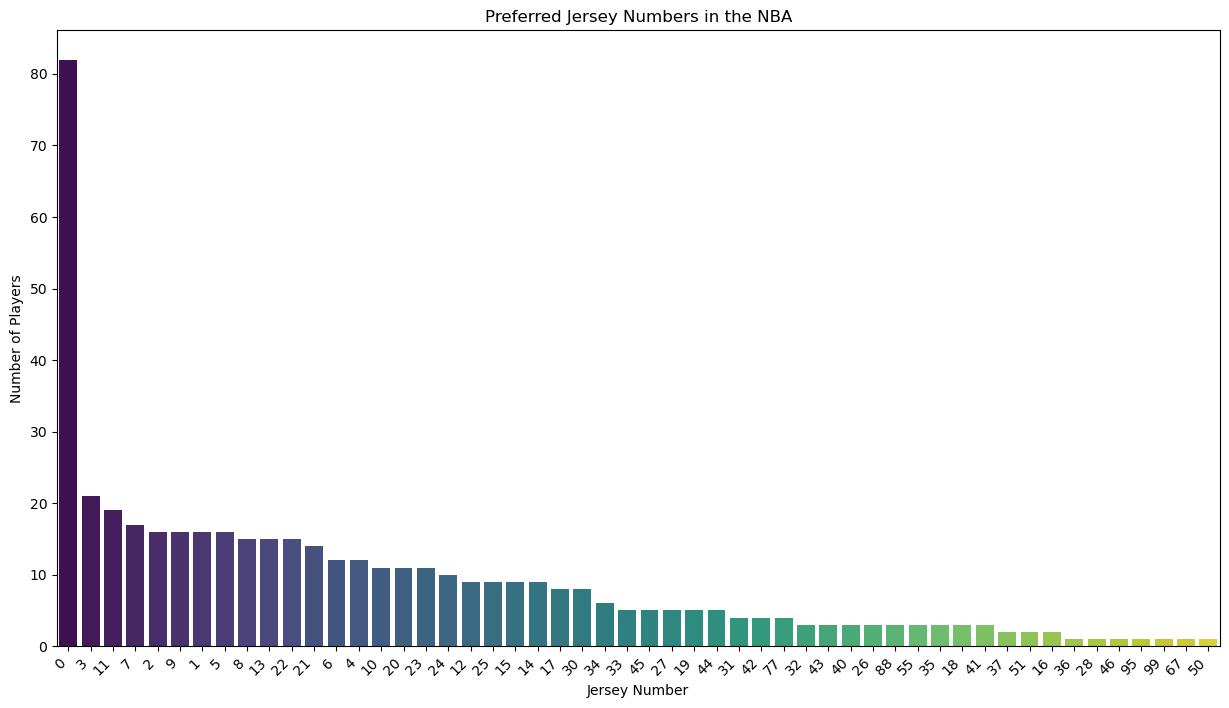

In [ ]:
# Veri çerçevesini oluşturma (örnek olarak "jersey" sütunu kullanılıyor)
jersey_data = data['jersey']

# Forma numaralarının frekanslarını sayma
jersey_counts = jersey_data.value_counts()

# Seaborn ile çubuk grafiği oluşturma
plt.figure(figsize=(15, 8))
sns.barplot(x=jersey_counts.index, y=jersey_counts.values, palette="viridis")
plt.xlabel('Jersey Number')
plt.ylabel('Number of Players')
plt.title('Preferred Jersey Numbers in the NBA')
plt.xticks(rotation=45, ha='right')  # Eksen etiketlerini döndürmek
plt.show()

In [ ]:
# Forma numarası 0 olan ve takım adı boş olan oyuncuların listesi

players_with_jersey_0_and_empty_team = data[(data['jersey'] == '0') & (data['team'].isnull())]

# Oyuncu isimlerini listeleme

player_names_with_jersey_0_and_empty_team = players_with_jersey_0_and_empty_team['player_name'].tolist()

# Liste olarak oyuncu isimlerini yazdırma

print("Players with Jersey Number 0 and Empty Team:")
for player_name in player_names_with_jersey_0_and_empty_team:
    print(player_name)
    
    
# Burada "0" forma numarası veri setinde 22 serbest oyuncunun kayıtlı olduğunu görüyoruz, bu da neden "0" forma numarasına sahip bu kadar çok oyuncunun bulunduğunu açıklıyor.

Players with Jersey Number 0 and Empty Team:
DeMarcus Cousins
Michael Beasley
Gerald Green
Isaiah Thomas
Pau Gasol
Allonzo Trier
Chandler Parsons
Ivan Rabb
Allen Crabbe
CJ Miles
Jonathon Simmons
Antonio Blakeney
Tim Frazier
Deyonta Davis
Tyler Lydon
Miles Plumlee
Jemerrio Jones
Yante Maten
Henry Ellenson
Amile Jefferson
Tyrone Wallace
Isaiah Hartenstein


In [ ]:
# Forma numarası 0 olan ve takım adı boş olan oyuncuların listesi
players_with_jersey_0_and_empty_team = data[(data['jersey'] == '0') & (data['team'].isnull())]

# Oyuncu isimlerini listeleme
player_names_with_jersey_0_and_empty_team = players_with_jersey_0_and_empty_team['player_name'].tolist()

# Team (takım) kısmına "off_season" yazdırma
data.loc[data['player_name'].isin(player_names_with_jersey_0_and_empty_team), 'team'] = 'off_season'

display(data.head())

,player_name,rating,jersey,team,position,b_day,height (m),weight (kg),salary,country,draft_year,draft_round,draft_peak,college,version,age
0,LeBron James,97,23,Los Angeles Lakers,F,1984-12-30,2.06,113.4,$37436858,USA,2003,1,1,NaN,NBA2k20,36
1,Kawhi Leonard,97,2,Los Angeles Clippers,F,1991-06-29,2.01,102.1,$32742000,USA,2011,1,15,San Diego State,NBA2k20,29
2,Giannis Antetokounmpo,96,34,Milwaukee Bucks,F-G,1994-12-06,2.11,109.8,$25842697,Greece,2013,1,15,NaN,NBA2k20,26
3,Kevin Durant,96,7,Brooklyn Nets,F,1988-09-29,2.08,104.3,$37199000,USA,2007,1,2,Texas,NBA2k20,32
4,James Harden,96,13,Houston Rockets,G,1989-08-26,1.96,99.8,$38199000,USA,2009,1,3,Arizona State,NBA2k20,31


In [ ]:
# "team" kısmında "off_season" yazan oyuncuları filtreleme
off_season_players = data[data['team'] == 'off_season'][['player_name', 'team']]
display(off_season_players)

,player_name,team
33,DeMarcus Cousins,off_season
168,Michael Beasley,off_season
177,Gerald Green,off_season
198,Isaiah Thomas,off_season
203,Pau Gasol,off_season
237,Allonzo Trier,off_season
264,Chandler Parsons,off_season
266,Ivan Rabb,off_season
283,Allen Crabbe,off_season
294,CJ Miles,off_season


In [ ]:
# Forma numarası 0 olan ve bir takımda oynayan oyuncuların listesi

players_with_jersey_0_and_team = data[(data['jersey'] == '0') & (~data['team'].isnull())]

# Oyuncu isimlerini listeleme

player_names_with_jersey_0_and_team = players_with_jersey_0_and_team['player_name'].tolist()

# Liste olarak oyuncu isimlerini yazdırma

print("Players with Jersey Number 0 and Playing for a Team:")
for player_name in player_names_with_jersey_0_and_team:
    print(player_name)

Players with Jersey Number 0 and Playing for a Team:
Damian Lillard
Russell Westbrook
D'Angelo Russell
DeMarcus Cousins
Andre Drummond
Jayson Tatum
Kyle Kuzma
Kevin Love
Aaron Gordon
Reggie Jackson
Josh Richardson
Willie Cauley-Stein
Marcus Morris
Jabari Parker
Jeff Teague
Justise Winslow
Malik Beasley
DeMarre Carroll
Alex Len
Trevor Ariza
Michael Beasley
Miles Bridges
Dewayne Dedmon
Gorgui Dieng
Gerald Green
Michael Kidd-Gilchrist
Meyers Leonard
Isaiah Thomas
Coby White
Pau Gasol
James Johnson
Rodions Kurucs
Shabazz Napier
Noah Vonleh
Allonzo Trier
Jordan Bell
Moe Harkless
Tyler Johnson
Joakim Noah
Chandler Parsons
Ivan Rabb
Jonah Bolden
Alec Burks
Allen Crabbe
James Ennis
CJ Miles
David Nwaba
Jonathon Simmons
Omari Spellman
Antonio Blakeney
Donte DiVincenzo
Tim Frazier
Brandon Knight
Cameron Payne
Anthony Tolliver
Alfonzo McKinnie
Nicolas Claxton
Ryan Broekhoff
De'Anthony Melton
Nickeil Alexander-Walker
Deyonta Davis
Jacob Evans
Keita Bates-Diop
Skal Labissiere
Tyler Lydon
Miles Plum

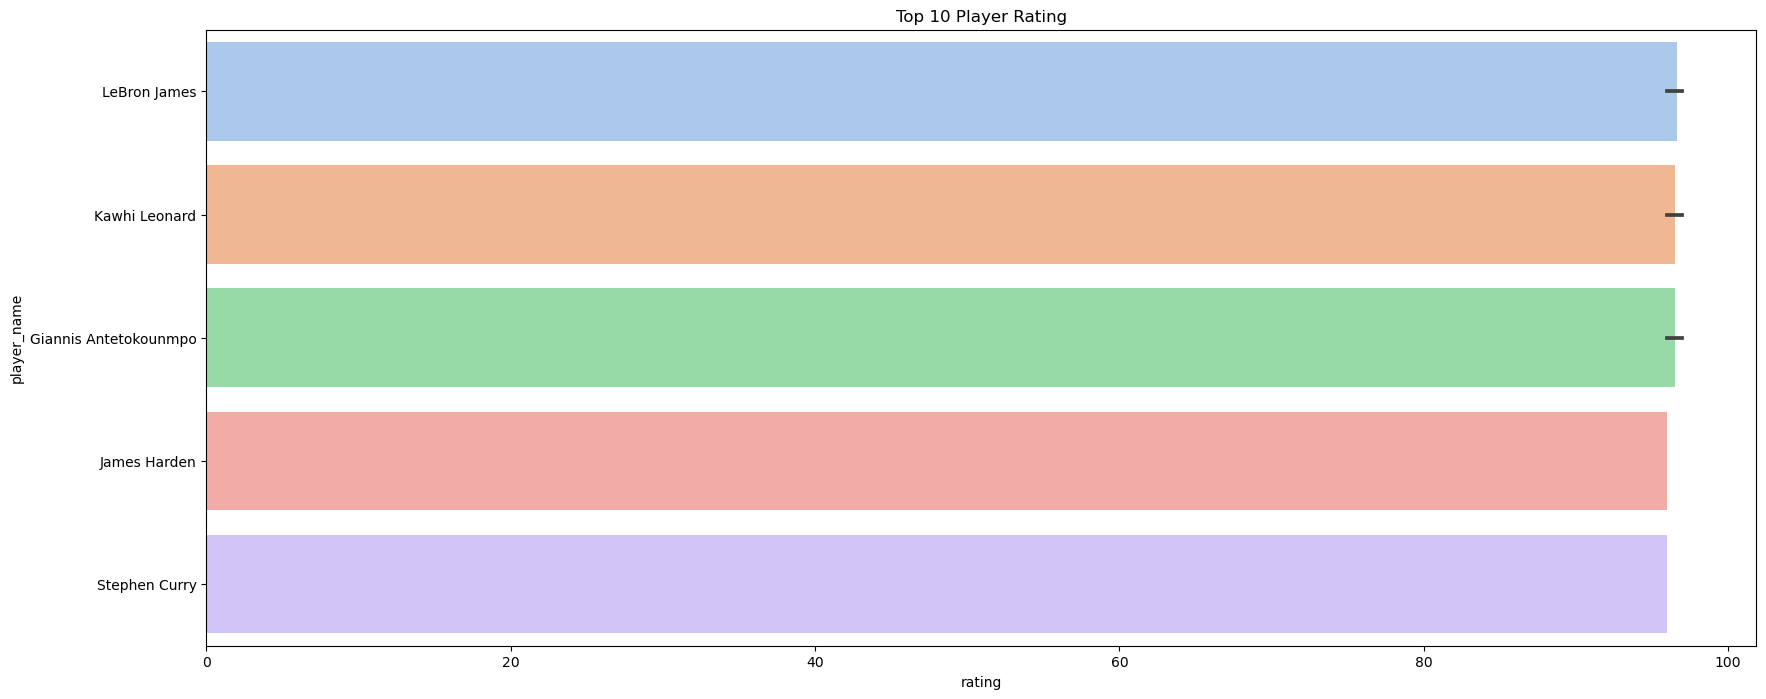

In [ ]:
plt.figure(figsize=(20, 8))
plt.title('Top 10 Player Rating')

# Veri setini sırala ve ilk 10 oyuncuyu seç
top_10_players = data.sort_values('rating', ascending=False)[:10]

# Seaborn ile çubuk grafiği oluştur
sns.barplot(x='rating', y='player_name', data=top_10_players, palette='pastel')

plt.show()

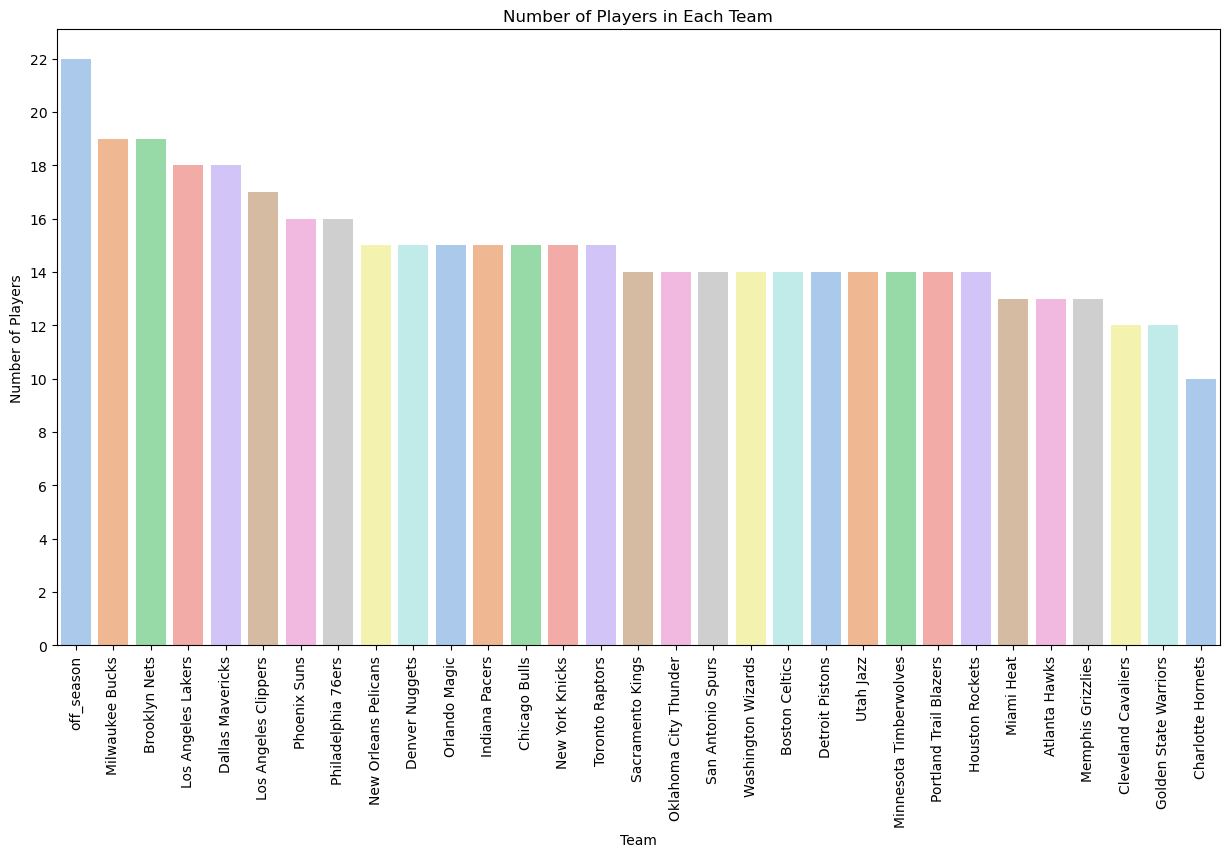

In [ ]:
team_player_counts = data['team'].value_counts()

# Create a bar plot showing the player counts for each team

plt.figure(figsize=(15, 8))
sns.barplot(x=team_player_counts.index, y=team_player_counts.values, palette='pastel')
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.title('Number of Players in Each Team')

# Y eksenindeki sayıları belirli bir adımla ve aralıkla ayarlama

plt.yticks(range(0, max(team_player_counts.values)+1, 2), [str(i) for i in range(0, max(team_player_counts.values)+1, 2)])

plt.show()

In [ ]:
# position

data['position'].value_counts()

position
G      184
F      146
C       53
F-C     39
G-F     21
F-G     15
C-F      6
Name: count, dtype: int64